In [1]:
#import required packages
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
#import data
fifa19 = pd.read_csv('W:/Ckalib.Nelson/HackCville/Homework/fifa19/data.csv')
#18,207 rows (players) and 89 columns (attributes)
fifa19.shape

(18207, 89)

In [3]:
#Rename a couple columns
fifa19.rename(columns={'Wage': 'Wage (thousands)', 'Release Clause': 'Release Clause (millions)'}, inplace=True)
#Remove unnecessary characters from columns
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].str.replace('€','')
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].str.replace('K','')
#Convert Wage (thousands) from an object to a float
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].astype('float64')
#Remove unnecessary characters from columns
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('€','')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('M','')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('K','')
#Convert Release Clause (millions) from an object to a float
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].astype('float64')

In [4]:
#first five results 
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (millions)
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [5]:
#Create a function converting "Overall" into a category for World Class, First Team, etc. players
def overall_category(Overall):
    if Overall > 90:
        return "World Class"
    elif Overall <= 90 and Overall >= 85:
        return "First Team"
    elif Overall <=84 and Overall >= 80:
        return "Above Average"
    elif Overall <=79 and Overall >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Overall Category'] = fifa19['Overall'].apply(overall_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)

(18207, 90)


In [6]:
#Create a function converting "Potential" into a category for potential World Class, First Team, etc. players
def potential_category(Potential):
    if Potential > 90:
        return "World Class"
    elif Potential <= 90 and Potential >= 85:
        return "First Team"
    elif Potential <=84 and Potential >= 80:
        return "Above Average"
    elif Potential <=79 and Potential >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Potential Category'] = fifa19['Potential'].apply(potential_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)

(18207, 91)


In [7]:
#Create a column calculating the differnce between Overall and Potential to see those w/ the most potential opportunity
fifa19['Potential Rise'] = fifa19['Potential'] - fifa19['Overall']
print(fifa19.shape)
#An additional column from the previous count shows that a column has been added to the dataset

(18207, 92)


In [8]:
#view columns in dataset
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
       'Wage (thousands)', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle

In [9]:
#Use groupby to determine the average potential rise per overall category
overallGroups = fifa19.groupby('Overall Category')
overallGroups['Potential Rise'].mean()

Overall Category
Above Average    1.883146
Average          2.465473
Below Average    6.268120
First Team       1.247525
World Class      0.444444
Name: Potential Rise, dtype: float64

In [10]:
#Use groupby to determine the average overall, potential, and potential rise per age
ageGroups = fifa19.groupby('Age')
ageGroups['Overall','Potential Rise','Potential'].mean().head()

,Overall,Potential Rise,Potential
Age,,,
16,54.452381,18.738095,73.190476
17,56.404844,17.934256,74.339100
18,57.741803,15.788251,73.530055
19,59.583008,13.563477,73.146484
20,61.858871,11.354839,73.213710


In [11]:
#create dataframe of world class players
world_class = fifa19[fifa19['Overall Category'] =='World Class']

#create dataframe of first team players
first_team = fifa19[fifa19['Overall Category'] =='First Team']

#create dataframe of first team players
above_average_players = fifa19[fifa19['Overall Category'] =='Above Average']

#create dataframe of average players
average_players = fifa19[fifa19['Overall Category']=='Average']

#create dataframe of those w/ the potential of becoming world class players
potential_world_class = fifa19[(fifa19['Potential Category'] =='World Class') & (fifa19['Overall Category'] !='World Class')]

#create dataframe of those w/ the potential of becoming first team players
potential_first_team = fifa19[(fifa19['Potential Category'] =='First Team') & (fifa19['Overall Category'] !='First Team')]

#create dataframe those w/ the potential of becoming first team players
potential_above_average_players = fifa19[(fifa19['Potential Category'] =='Above Average') & (fifa19['Overall Category'] !='Above Average')]

#create dataframe those w/ the potential of becoming average players
potential_average_players = fifa19[(fifa19['Potential Category']=='Average') & (fifa19['Overall Category'] !='Average')]

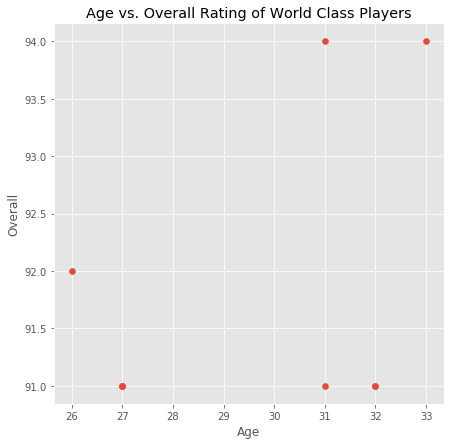

In [12]:
#plot scatter plot of relationship between Age and Overall of world class players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(world_class[['Age']],world_class[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of World Class Players')
plt.show()

#no significant relationship between the two variables

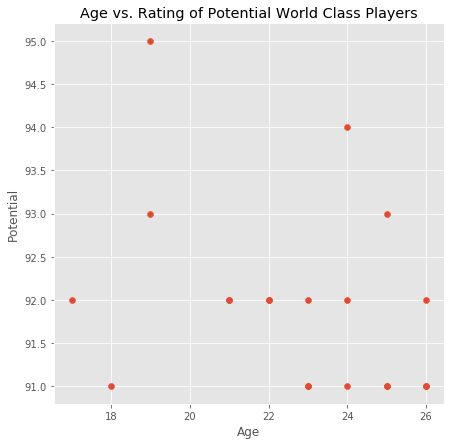

In [13]:
#plot scatter plot of relationship between Age and Potential of world class players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(potential_world_class[['Age']],potential_world_class[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Rating of Potential World Class Players')
plt.show()

#seemingly no significant relationship between the two variables

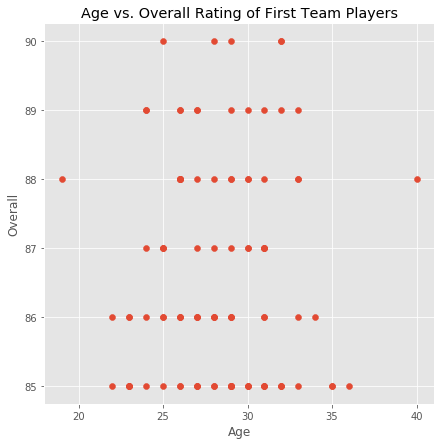

In [14]:
#plot scatter plot of relationship between Age and Overall of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of First Team Players')
plt.show()
#no significant relationship between the two variables

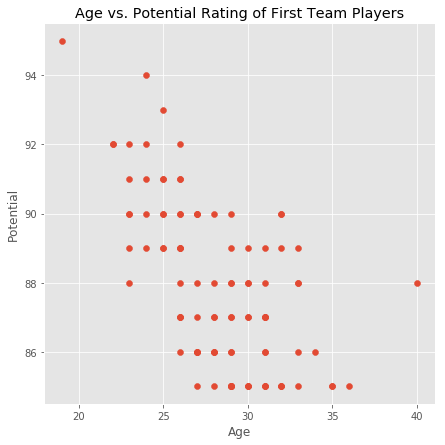

In [15]:
#plot scatter plot of relationship between Age and Potential of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of First Team Players')
plt.show()
#significant relationship between the two variables

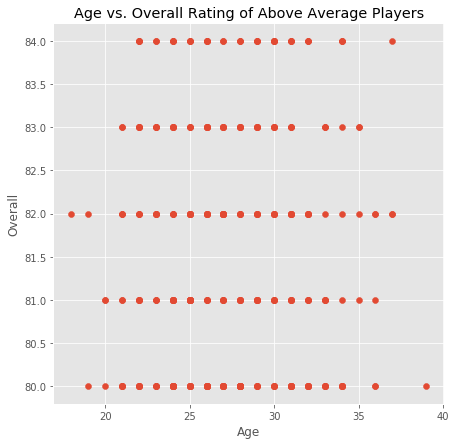

In [16]:
#plot scatter plot of relationship between Age and Overall of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of Above Average Players')
plt.show()
#no significant relationship between the two variables

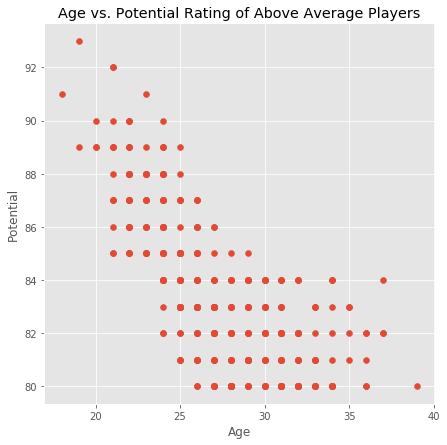

In [17]:
#plot scatter plot of relationship between Age and Potential of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of Above Average Players')
plt.show()
#significant relationship between the two variables

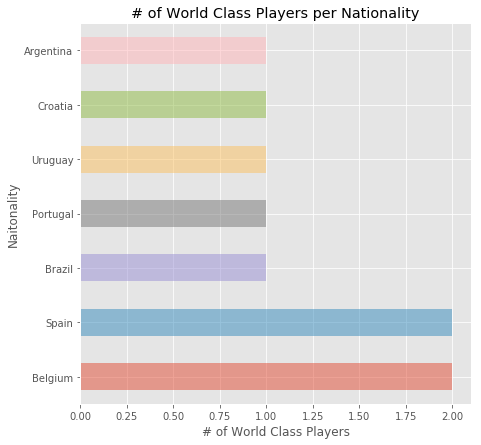

In [18]:
#visualize nationalities w/ the most world class players
world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of World Class Players per Nationality')
plt.xlabel('# of World Class Players')
plt.ylabel('Naitonality')
plt.show()

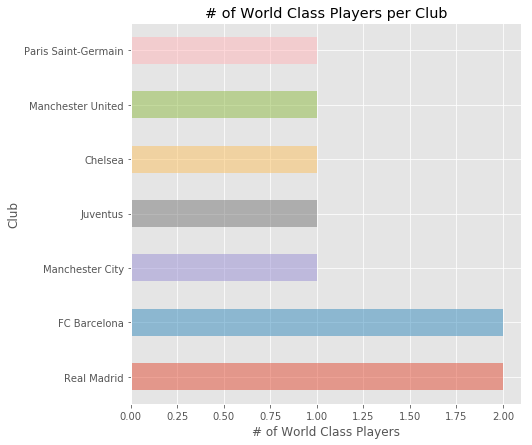

In [19]:
#visualize clubs w/ the most world class players
world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of World Class Players per Club')
plt.xlabel('# of World Class Players')
plt.ylabel('Club')
plt.show()

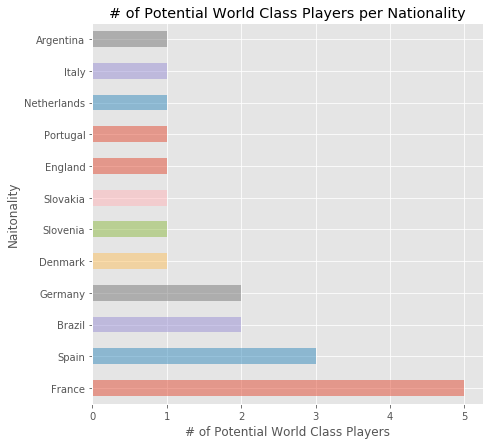

In [20]:
#visualize nationalities w/ the most potential world class players
potential_world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of Potential World Class Players per Nationality')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Naitonality')
plt.show()

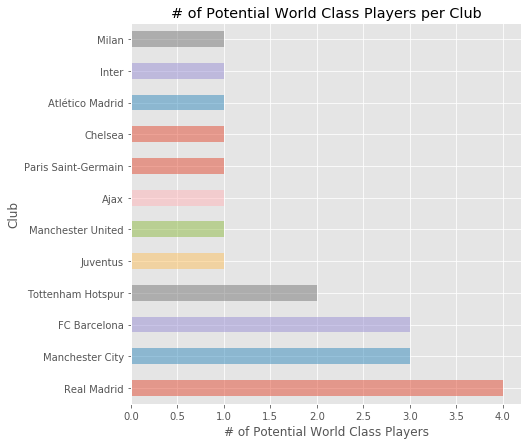

In [21]:
#visualize clubs w/ the most potential world class players
potential_world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of Potential World Class Players per Club')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Club')
plt.show()

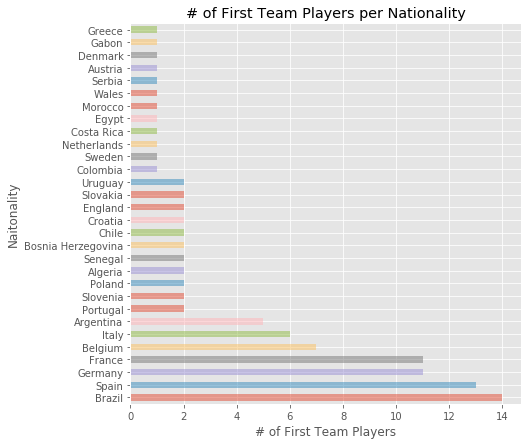

In [22]:
#visualize nationalities w/ the most first team players
first_team['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of First Team Players per Nationality')
plt.xlabel('# of First Team Players')
plt.ylabel('Naitonality')
plt.show()

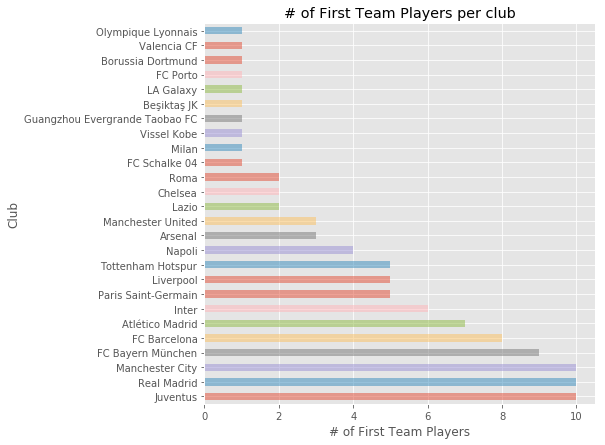

In [23]:
#visualize clubs w/ the most first team players
first_team['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of First Team Players per club')
plt.xlabel('# of First Team Players')
plt.ylabel('Club')
plt.show()

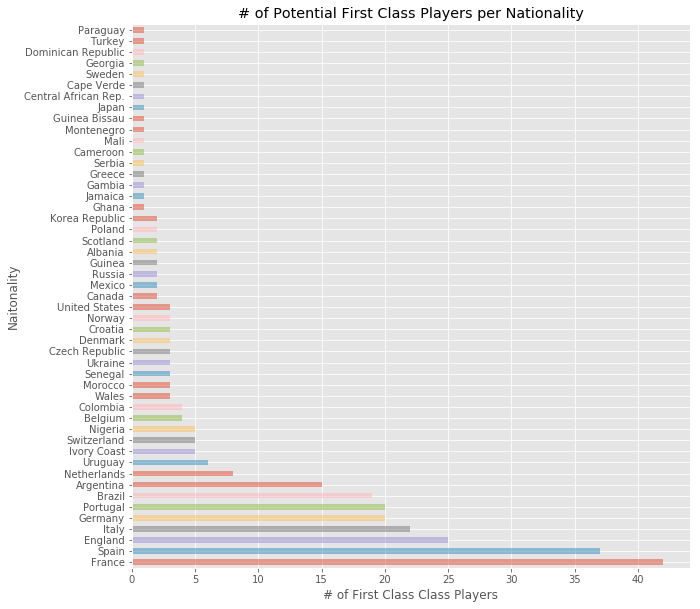

In [24]:
#visualize nationalities w/ the most potential world class players
potential_first_team['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential First Class Players per Nationality')
plt.xlabel('# of First Class Class Players')
plt.ylabel('Naitonality')
plt.show()

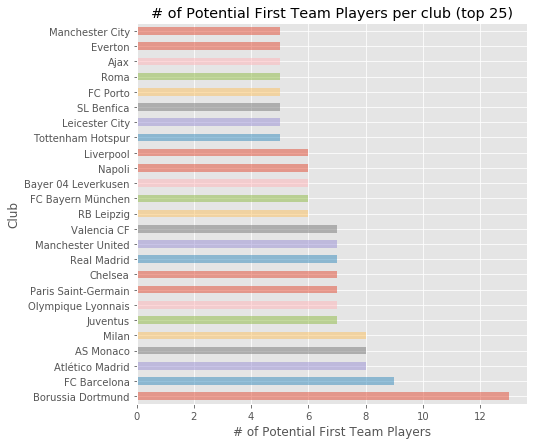

In [25]:
#visualize clubs w/ the most potential first team players - top 25
potential_first_team['Club'].value_counts().head(25).plot(kind='barh',alpha=0.5,figsize=(7,7))
plt.title('# of Potential First Team Players per club (top 25)')
plt.xlabel('# of Potential First Team Players')
plt.ylabel('Club')
plt.show()

In [26]:
#Create dataframe of players w/ an overall rating greater than or equal to 80
over80 = fifa19[fifa19['Overall'] >= 80]
over80.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (millions),Overall Category,Potential Category,Potential Rise
550,550,121944,B. Schweinsteiger,33,https://cdn.sofifa.org/players/4/19/121944.png,Germany,https://cdn.sofifa.org/flags/21.png,80,80,Chicago Fire,...,75.0,14.0,14.0,13.0,13.0,11.0,8.7,Above Average,Above Average,0
551,551,110677,Moyá,34,https://cdn.sofifa.org/players/4/19/110677.png,Spain,https://cdn.sofifa.org/flags/45.png,80,80,Real Sociedad,...,14.0,84.0,77.0,81.0,80.0,79.0,12.6,Above Average,Above Average,0
552,552,54050,W. Rooney,32,https://cdn.sofifa.org/players/4/19/54050.png,England,https://cdn.sofifa.org/flags/14.png,80,80,DC United,...,40.0,10.0,11.0,13.0,8.0,7.0,18.0,Above Average,Above Average,0
553,553,49369,Fernando Torres,34,https://cdn.sofifa.org/players/4/19/49369.png,Spain,https://cdn.sofifa.org/flags/45.png,80,80,Sagan Tosu,...,18.0,14.0,13.0,8.0,9.0,10.0,10.0,Above Average,Above Average,0
554,554,49031,S. Sorrentino,39,https://cdn.sofifa.org/players/4/19/49031.png,Italy,https://cdn.sofifa.org/flags/27.png,80,80,Chievo Verona,...,13.0,81.0,82.0,66.0,82.0,79.0,1.7,Above Average,Above Average,0


In [27]:
#From over 18,000 players to 555 with an overall rating of 80 or above
over80.shape

(555, 92)

In [28]:
#Fiding the average speed by age, use double brackets to make it a data frame
ages = over80.groupby('Age')
avgspeed = ages[['SprintSpeed']].mean()
avgspeed.reset_index(inplace=True)
avgspeed.head()

,Age,SprintSpeed
0,18,72.000000
1,19,78.666667
2,20,87.333333
3,21,76.307692
4,22,79.833333


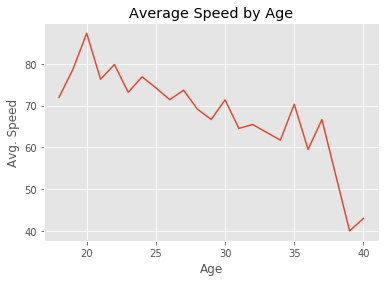

In [29]:
#Plot the relationship between age and average speed of players w/ an overall rating greater than or equal to 80
plt.plot(avgspeed[['Age']], avgspeed[['SprintSpeed']])
plt.xlabel('Age')
plt.ylabel('Avg. Speed')
plt.title('Average Speed by Age')
plt.show();

In [30]:
#Fastest 10 nations
nations = over80.groupby('Nationality')
natspeed = nations[['SprintSpeed']].mean()
natspeed.reset_index(inplace=True)
natspeed.sort_values('SprintSpeed', ascending=False).head(10)

,Nationality,SprintSpeed
23,Gabon,95.0
61,Venezuela,92.0
19,Egypt,91.0
33,Jamaica,90.0
15,DR Congo,88.0
37,Mali,88.0
36,Korea Republic,87.0
50,Scotland,86.0
18,Ecuador,85.0
17,Dominican Republic,85.0


In [31]:
#Slowest 10 nations
natspeed.sort_values('SprintSpeed', ascending=False).tail(10)

,Nationality,SprintSpeed
35,Kenya,61.000000
39,Montenegro,61.000000
27,Guinea,60.000000
56,Sweden,59.333333
29,Iceland,55.000000
12,Costa Rica,53.000000
14,Czech Republic,47.000000
43,Norway,46.000000
28,Hungary,44.000000
21,Finland,44.000000


In [32]:
#Fastest 10 clubs
clubs = over80.groupby('Club')
clubspeed = clubs[['SprintSpeed']].mean()
clubspeed.reset_index(inplace=True)
clubspeed.sort_values('SprintSpeed', ascending=False).head(10)

,Club,SprintSpeed
9,Atlanta United,90.5
57,Medipol Başakşehir FK,89.0
51,Levante UD,88.0
92,Tianjin Quanjian FC,85.0
26,Dalian YiFang FC,83.0
11,Atlético Mineiro,82.0
95,Toronto FC,80.0
54,Los Angeles FC,80.0
39,Getafe CF,79.0
5,Al Nassr,79.0


In [33]:
#Slowest 10 clubs
clubspeed.sort_values('SprintSpeed', ascending=False).tail(10)

,Club,SprintSpeed
0,1. FC Köln,51.0
78,SC Braga,51.0
99,VfL Wolfsburg,50.5
84,Sassuolo,49.5
45,Hertha BSC,46.0
27,Deportivo Alavés,42.0
76,River Plate,40.0
59,Montpellier HSC,40.0
88,Southampton,38.0
21,Chicago Fire,37.0


In [34]:
#Finding the average wage by age for world class players
world_class_ages = world_class.groupby('Age')
wc_avgs_wage = world_class_ages[['Wage (thousands)']].mean()
wc_avgs_wage.reset_index(inplace=True)
#Finding the average wage by age for first team players
first_team_ages = first_team.groupby('Age')
ft_avgs_wage = first_team_ages[['Wage (thousands)']].mean()
ft_avgs_wage.reset_index(inplace=True)
#Finding the average wage by age for above average players
above_average_ages = above_average_players.groupby('Age')
aa_avgs_wage = above_average_ages[['Wage (thousands)']].mean()
aa_avgs_wage.reset_index(inplace=True)
#Finding the average wage by age for average players
average_ages = average_players.groupby('Age')
a_avgs_wage = average_ages[['Wage (thousands)']].mean()
a_avgs_wage.reset_index(inplace=True)
#Plot results of world class average wages
wc_avgs_wage

,Age,Wage (thousands)
0,26,290.000000
1,27,318.333333
2,31,510.000000
3,32,400.000000
4,33,405.000000


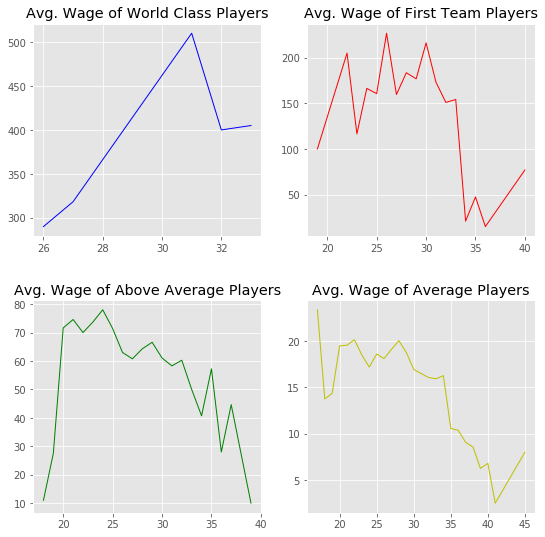

In [35]:
#draw subplots illustrating relationship between overall categories and wages
plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=.3)
plt.subplot(2,2,1)
plt.title('Avg. Wage of World Class Players')
plt.plot(wc_avgs_wage[['Age']],wc_avgs_wage[['Wage (thousands)']],color='b',linestyle='-',linewidth=1)
plt.subplot(2,2,2)
plt.title('Avg. Wage of First Team Players')
plt.plot(ft_avgs_wage[['Age']],ft_avgs_wage[['Wage (thousands)']],color='r',linestyle='-',linewidth=1)
plt.subplot(2,2,3)
plt.title('Avg. Wage of Above Average Players')
plt.plot(aa_avgs_wage[['Age']],aa_avgs_wage[['Wage (thousands)']],color='g',linestyle='-',linewidth=1)
plt.subplot(2,2,4)
plt.title('Avg. Wage of Average Players')
plt.plot(a_avgs_wage[['Age']],a_avgs_wage[['Wage (thousands)']],color='y',linestyle='-',linewidth=1)
plt.show()

In [36]:
#import seaborn
import seaborn as sns
%matplotlib inline

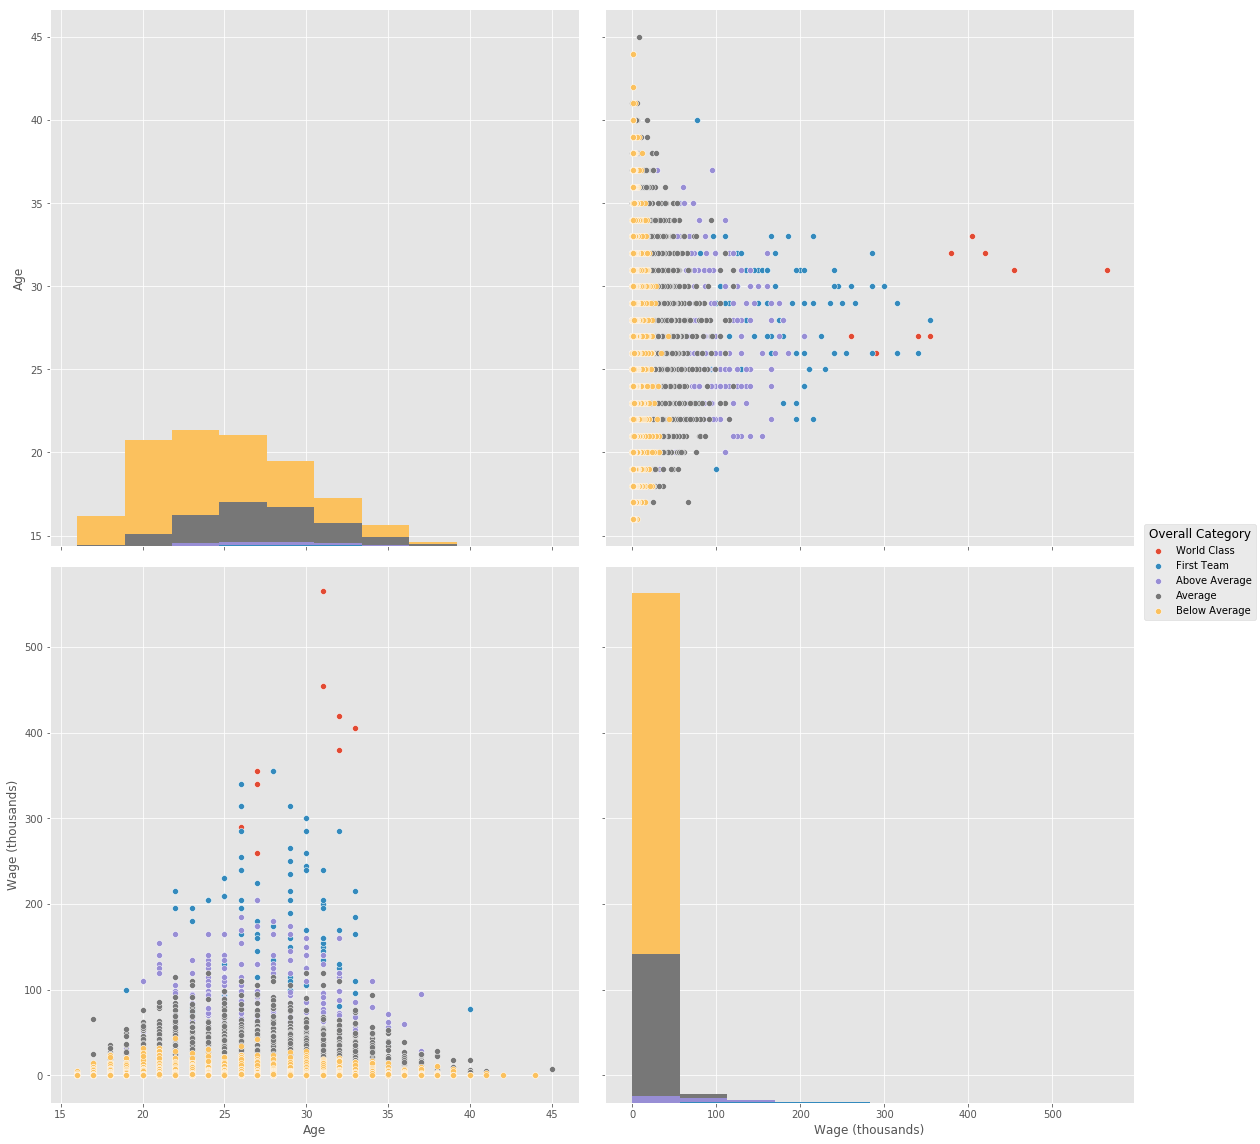

In [37]:
#draw the pair plot using sns for age, wage, overall category and with hue overall category
#note: hue is variable in data set to map plot aspects to different colors
sns.pairplot(fifa19[['Age','Wage (thousands)','Overall Category']],hue='Overall Category',size=8);
#The first and second graph graph illustrates the count of players in each overall category and classifies overall category by age, respectively
#The third and fourth graph illustrates a classification of wage by overall category and the count of players of a certain wage

Text(0,0.5,'Count')

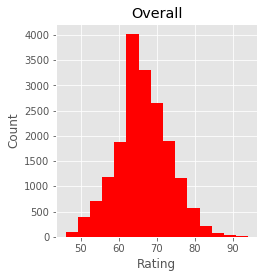

In [62]:
#Looking at the distribution of various attributes in the game
plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=.3)
plt.subplots_adjust(wspace=.5)
plt.subplot(221)
plt.hist(fifa19['Overall'], bins = 15, color = 'r')
plt.title('Overall')
plt.xlabel('Rating')
plt.ylabel('Count')
#plt.subplot(222)
#plt.hist(fifa19['SprintSpeed'], bins = 15, color = 'r')
#plt.title('Speed')
#plt.xlabel('Rating')
#plt.ylabel('Count')
#plt.subplot(223)
#plt.hist(fifa19['Strength'], bins = 15, color = 'c')
#plt.title('Strength')
#plt.xlabel('Rating')
#plt.ylabel('Count')
#plt.subplot(224)
#plt.hist(fifa19['Dribbling'], bins = 15, color = 'y')
#plt.title('Dribling')
#plt.xlabel('Rating')
#plt.ylabel('Count')

In [42]:
#Writing a function to get a categories for wages
def wage_cat(Wage):
    if Wage >= 200:
        return (">200")
    elif Wage < 200 and Wage >= 100:
        return ("100-200")
    elif Wage < 100 and Wage >= 50:
        return ("50-100")
    elif Wage < 50 and Wage >= 10:
        return ("10-50")
    else:
        return ("<10")
fifa19['Wage Category'] = fifa19['Wage (thousands)'].apply(wage_cat)
print(fifa19.shape)

(18207, 93)


In [43]:
#Getting separate data frames for attackers and defenders
attackers = fifa19[(fifa19['Position'] == "ST") | (fifa19['Position'] == "LF") | (fifa19['Position'] == "LW") | 
       (fifa19['Position'] == "RF") | (fifa19['Position'] == "RW") | (fifa19['Position'] == "LS") | 
                   (fifa19['Position'] == "RS") | (fifa19['Position'] == "CF")]
defenders = fifa19[(fifa19['Position'] == "LWB") | (fifa19['Position'] == "LB") | (fifa19['Position'] == "RWB") | 
                  (fifa19['Position'] == "CB") | (fifa19['Position'] == "RB") | (fifa19['Position'] == "RCB") | 
                  (fifa19['Position'] == "LCB")]

In [44]:
#Do higher wages indicate better attributes for attackers?
Wages = attackers.groupby('Wage Category')
speed = Wages[['SprintSpeed']].mean()
speed.reset_index(inplace=True)
dribbling = Wages[['Dribbling']].mean()
dribbling.reset_index(inplace=True)
finishing = Wages[['Finishing']].mean()
finishing.reset_index(inplace=True)
over = Wages[['Overall']].mean()
over.reset_index(inplace=True)

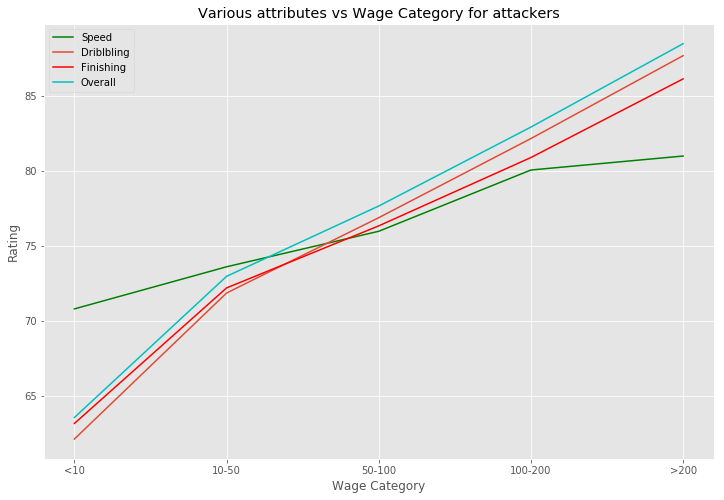

In [45]:
#reference for plotting categorical data: https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
plt.figure(figsize=(12, 8))
data1 = {'<10': 70.793574, '10-50': 73.604798, '50-100': 75.976744, '100-200': 80.066667, '>200': 81}
names1 = list(data1.keys())
values1 = list(data1.values())
data2 = {'<10': 62.105221, '10-50': 71.854798, '50-100': 76.883721, '100-200': 82.166667, '>200': 87.700000}
names2 = list(data2.keys())
values2 = list(data2.values())
data3 = {'<10': 63.144177, '10-50': 72.194444, '50-100': 76.337209, '100-200': 80.900000, '>200': 86.150000}
names3 = list(data3.keys())
values3 = list(data3.values())
data4 = {'<10': 63.541365, '10-50': 72.967172, '50-100': 77.662791, '100-200': 82.933333, '>200': 88.500000}
names4 = list(data4.keys())
values4 = list(data4.values())
plt.plot(names1, values1, color='g', label = 'Speed')
plt.plot(names2, values2, label = 'Driblbling')
plt.plot(names3, values3, color='r', label = 'Finishing')
plt.plot(names4, values4, color='c', label = 'Overall')
plt.xlabel('Wage Category')
plt.ylabel('Rating')
plt.title('Various attributes vs Wage Category for attackers')
plt.legend()

In [46]:
Wages2 = defenders.groupby('Wage Category')
speed2 = Wages2[['SprintSpeed']].mean()
speed2.reset_index(inplace=True)
interceptions = Wages2[['Interceptions']].mean()
interceptions.reset_index(inplace=True)
stand = Wages2[['StandingTackle']].mean()
stand.reset_index(inplace=True)
over2 = Wages2[['Overall']].mean()
over2.reset_index(inplace=True)

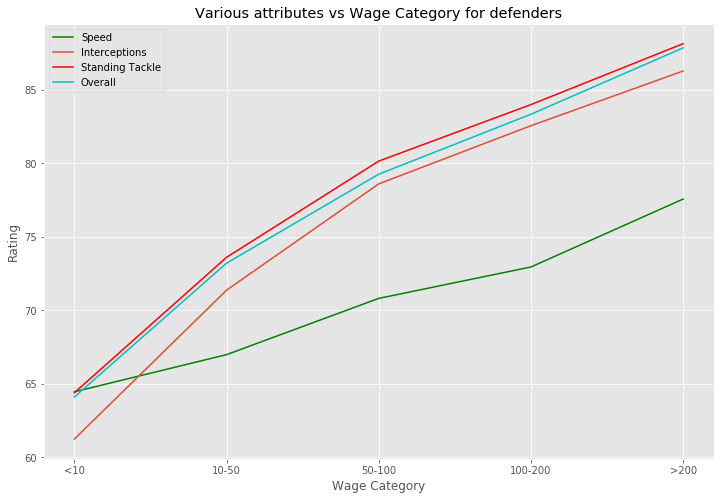

In [47]:
plt.figure(figsize=(12, 8))
data1 = {'<10': 64.459722, '10-50': 66.986183, '50-100': 70.813953, '100-200': 72.951220, '>200': 77.571429}
names1 = list(data1.keys())
values1 = list(data1.values())
data2 = {'<10': 61.244538, '10-50': 71.375648, '50-100': 78.604651, '100-200': 82.560976, '>200': 86.285714}
names2 = list(data2.keys())
values2 = list(data2.values())
data3 = {'<10': 64.397263, '10-50': 73.608808, '50-100': 80.155039, '100-200': 84.000000, '>200': 88.142857}
names3 = list(data3.keys())
values3 = list(data3.values())
data4 = {'<10': 64.106378, '10-50': 73.212435, '50-100': 79.263566, '100-200': 83.341463, '>200': 87.857143}
names4 = list(data4.keys())
values4 = list(data4.values())
plt.plot(names1, values1, color='g', label = 'Speed')
plt.plot(names2, values2, label = 'Interceptions')
plt.plot(names3, values3, color='r', label = 'Standing Tackle')
plt.plot(names4, values4, color='c', label = 'Overall')
plt.xlabel('Wage Category')
plt.ylabel('Rating')
plt.title('Various attributes vs Wage Category for defenders')
plt.legend()

In [48]:
categories = attackers['Skill Moves'].value_counts()
categories

3.0    1749
2.0    1357
4.0     294
5.0      18
Name: Skill Moves, dtype: int64

In [49]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [50]:
attackers['color'] = attackers['Skill Moves'].apply(lambda x: colors[categories.index.get_loc(x)])
attackers.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (millions),Overall Category,Potential Category,Potential Rise,Wage Category,color
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,11.0,15.0,14.0,8.0,226.5,World Class,World Class,0,>200,"[0.20803, 0.718701, 0.472873, 1.0]"
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,15.0,14.0,11.0,127.1,World Class,World Class,0,>200,"[0.993248, 0.906157, 0.143936, 1.0]"
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,9.0,15.0,15.0,11.0,228.1,World Class,World Class,1,>200,"[0.993248, 0.906157, 0.143936, 1.0]"
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,12.0,6.0,8.0,8.0,172.1,World Class,World Class,0,>200,"[0.20803, 0.718701, 0.472873, 1.0]"
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,25.0,31.0,33.0,37.0,164.0,World Class,World Class,0,>200,"[0.267004, 0.004874, 0.329415, 1.0]"


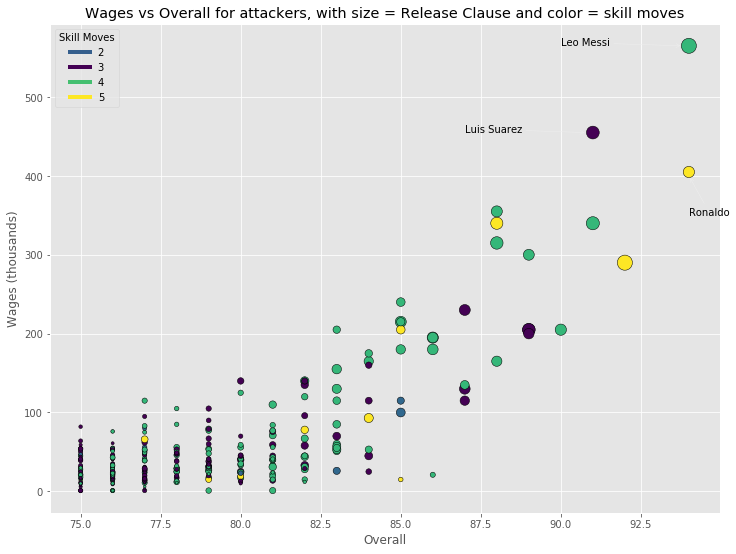

In [51]:
#Looking at the distribution of Overall and Wage for players 75 and above
#reference for the custom legend: https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D
attackers2 = attackers[attackers['Overall'] >= 75]
plt.figure(figsize=(12,9))
plt.scatter(attackers2['Overall'], attackers2['Wage (thousands)'], s=attackers2['Release Clause (millions)'], 
            edgecolors='black', c=attackers2['color'])
plt.xlabel('Overall')
plt.ylabel('Wages (thousands)')
plt.title('Wages vs Overall for attackers, with size = Release Clause and color = skill moves')
plt.annotate("Leo Messi", (93.8, 565), (90, 565), arrowprops={'arrowstyle': '->'})
plt.annotate("Luis Suarez", (90.8, 455), (87, 455), arrowprops={'arrowstyle': '->'})
plt.annotate("Ronaldo", (94, 400), (94, 350), arrowprops={'arrowstyle': '->'})
custom_lines = [Line2D([0], [0], color=cmap(0.3), lw=4),
                Line2D([0], [0], color=cmap(0), lw=4),
                Line2D([0], [0], color=cmap(.7), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
plt.legend(custom_lines, ['2', '3', '4', '5'], title = 'Skill Moves')